In [1]:
import sys
#sys.path.append("C:/Users/Surface/Documents/repos/playground")
sys.path.append("/home/peterhacker/Documents/phRepo/playground")

from Oceanmodel.policy_ve import *
from Oceanmodel.stateupdates_ve import *
from Oceanmodel.engine import *




                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (1460, 6, 1, 8)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded


/home/peterhacker/Documents/phRepo/playground/Oceanmodel/policy_ve.py:161: RuntimeWarning: invalid value encountered in divide
  allocations_normalized = allocations / np.sum(allocations)


KeyError: '9e753ff9-0c8b-4def-ad0f-7bb3fee903df'

In [ ]:
'''
testing...
Actions:
- behavioral
    x- lock
    x- withdraw
    x- vote
    - consume
- system
    x- rebalance ve
    x- allocate ve
    x- release ve
    - distribute rewards (df, fees)
'''

'\ntesting...\nActions:\n- behavioral\n    x- lock\n    x- withdraw\n    x- vote\n    - consume\n- system\n    x- rebalance ve\n    x- allocate ve\n    x- release ve\n    - distribute rewards (df, fees)\n'

In [ ]:
# Analysis and plotting modules
import pandas as pd
import numpy as np
# import plotly
import matplotlib.pyplot as plt

In [ ]:
#QA vote behavior
#for agent in simulation_result[simulation_result.substep == 3].agents_oceanholder.iloc[0].keys():
#    #for i in range(0,30):
#    #    print(f"timestep: {simulation_result[simulation_result.substep == 3].iloc[i].timestep} | ocean_balance {simulation_result[simulation_result.substep == 3].agents_oceanholder.iloc[i][agent].oceanbalance}")
#
#    #for acct in simulation_result[simulation_result.substep == 3].agents_oceanholder.iloc[20][agent].veaccounts.keys():
#    print(agent)
#    for asset in simulation_result[simulation_result.substep == 3].agents_oceanholder.iloc[600][agent].votepercent.keys():
#        print(asset)
#        for i in range(790,810):
#            print(i)
#            #if len(simulation_result[simulation_result.substep == 3].agents_oceanholder.iloc[i][agent].veaccounts.keys()) == 0:
#            if len(simulation_result[simulation_result.substep == 3].agents_oceanholder.iloc[i][agent].votepercent.keys()) == 0:
#                #print(f"timestep: {i} | no ve accounts")
#                print(f"timestep: {i} | no votes set")
#            else:
#                #print(f"timestep: {simulation_result[simulation_result.substep == 3].iloc[i].timestep} | ve_locked {simulation_result[simulation_result.substep == 3].agents_oceanholder.iloc[i][agent].veaccounts[acct].locked} | ve_unlocked {simulation_result[simulation_result.substep == 3].agents_oceanholder.iloc[i][agent].veaccounts[acct].unlocked} | ve_withdrawn {simulation_result[simulation_result.substep == 3].agents_oceanholder.iloc[i][agent].veaccounts[acct].withdrawn} | ve_duration {simulation_result[simulation_result.substep == 3].agents_oceanholder.iloc[i][agent].veaccounts[acct].lockduration}")
#                print(f"timestep: {simulation_result[simulation_result.substep == 3].iloc[i].timestep} | asset {asset} | vote {simulation_result[simulation_result.substep == 3].agents_oceanholder.iloc[i][agent].votepercent[asset]}")
#

In [ ]:
simulation_result

,agents_oceanholder,agents_data_asset,ocean_treasury,rewards_pool_df_active,rewards_pool_df_passive,rewards_pool_fees,distribution_schedule,simulation,subset,run,substep,timestep
0,{'f93f8bf9-b349-4996-8a15-7c439c39a42c': ocean...,{'b6b994e4-6737-49a2-b2fb-8a83829224aa': dataa...,503400000.0,0.0,0.0,0.0,"[[10000], [10000], [10000], [10000], [10000], ...",0,0,1,0,0
1,{'f93f8bf9-b349-4996-8a15-7c439c39a42c': ocean...,{'b6b994e4-6737-49a2-b2fb-8a83829224aa': dataa...,503400000.0,0.0,0.0,0.0,"[[10000], [10000], [10000], [10000], [10000], ...",0,0,1,1,1
2,{'f93f8bf9-b349-4996-8a15-7c439c39a42c': ocean...,{'b6b994e4-6737-49a2-b2fb-8a83829224aa': dataa...,503400000.0,0.0,0.0,0.0,"[[10000], [10000], [10000], [10000], [10000], ...",0,0,1,2,1
3,{'f93f8bf9-b349-4996-8a15-7c439c39a42c': ocean...,{'b6b994e4-6737-49a2-b2fb-8a83829224aa': dataa...,503400000.0,0.0,0.0,0.0,"[[10000], [10000], [10000], [10000], [10000], ...",0,0,1,3,1
4,{'f93f8bf9-b349-4996-8a15-7c439c39a42c': ocean...,{'b6b994e4-6737-49a2-b2fb-8a83829224aa': dataa...,503400000.0,0.0,0.0,0.0,"[[10000], [10000], [10000], [10000], [10000], ...",0,0,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5836,{'f93f8bf9-b349-4996-8a15-7c439c39a42c': ocean...,{'b6b994e4-6737-49a2-b2fb-8a83829224aa': dataa...,445395829.5,0.0,0.0,0.0,"[[10000], [10000], [10000], [10000], [10000], ...",0,0,1,4,1459
5837,{'f93f8bf9-b349-4996-8a15-7c439c39a42c': ocean...,{'b6b994e4-6737-49a2-b2fb-8a83829224aa': dataa...,445395829.5,0.0,0.0,0.0,"[[10000], [10000], [10000], [10000], [10000], ...",0,0,1,1,1460
5838,{'f93f8bf9-b349-4996-8a15-7c439c39a42c': ocean...,{'b6b994e4-6737-49a2-b2fb-8a83829224aa': dataa...,445395829.5,0.0,0.0,0.0,"[[10000], [10000], [10000], [10000], [10000], ...",0,0,1,2,1460
5839,{'f93f8bf9-b349-4996-8a15-7c439c39a42c': ocean...,{'b6b994e4-6737-49a2-b2fb-8a83829224aa': dataa...,445395829.5,0.0,0.0,0.0,"[[10000], [10000], [10000], [10000], [10000], ...",0,0,1,3,1460


In [ ]:
# Plots for each oceanholder:
# x1. ocean balance over time
# x2. ve balance over time
# x3. ocean locked over time
# x4. ocean unlocked over time
# x5. ocean withdrawn over time
# x6. asset vote percent over time

# Plots for each ve account: SKIPPED - baked into oceanholder plots
# 1. ve balance over time
# 2. ocean locked over time
# 3. ocean unlocked over time
# 4. ocean withdrawn over time

# Plots for each data asset:
# 1. data consume volume over time
# 2. ve allocation over time
# 3. count of oceanholders voting for asset over time

In [ ]:
agents_list = []
for i in range(0,max(simulation_result.timestep)):
    agents_list.append(simulation_result.agents_oceanholder[i].keys())
agents_list = list(set([item for sublist in agents_list for item in sublist]))
agents_list 

['5d511616-dbad-4d1d-a410-36da00a367f2',
 'f93f8bf9-b349-4996-8a15-7c439c39a42c',
 'c8e508a7-c938-4b87-b61e-9892299c9d10',
 'c8e8ca08-1ae9-4bfb-9fda-59d90d68cd3e']

In [ ]:
### troubleshooting? but think I fixed it...
#simulation_result[simulation_result.timestep == 308]
#simulation_result[simulation_result.substep == 3][simulation_result.timestep == 307]
#simulation_result[simulation_result.substep == 3][simulation_result.timestep == 308].agents_oceanholder.apply(lambda x: x[agents_list[0]].oceanbalance)
#simulation_result[simulation_result.timestep == 306].agents_oceanholder.iloc[0]
#simulation_result[simulation_result.timestep == 307].agents_oceanholder.iloc[0]
#simulation_result[simulation_result.timestep == 308].agents_oceanholder.iloc[0]

Agent 5d511616-dbad-4d1d-a410-36da00a367f2


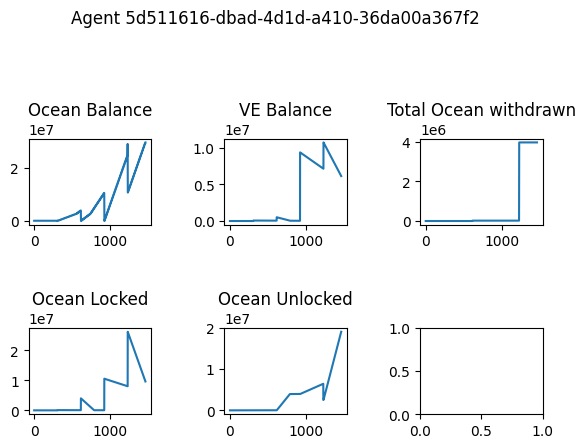

Agent f93f8bf9-b349-4996-8a15-7c439c39a42c


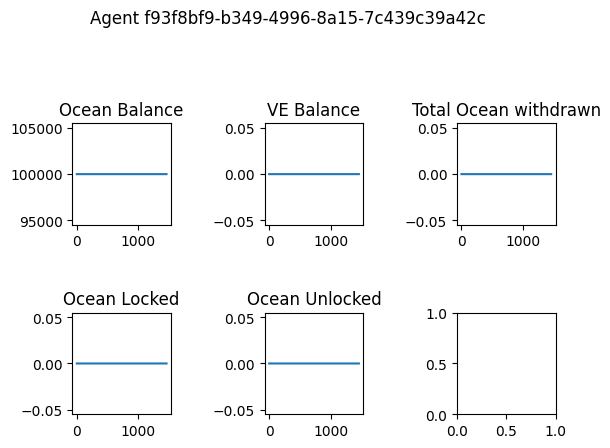

Agent c8e508a7-c938-4b87-b61e-9892299c9d10


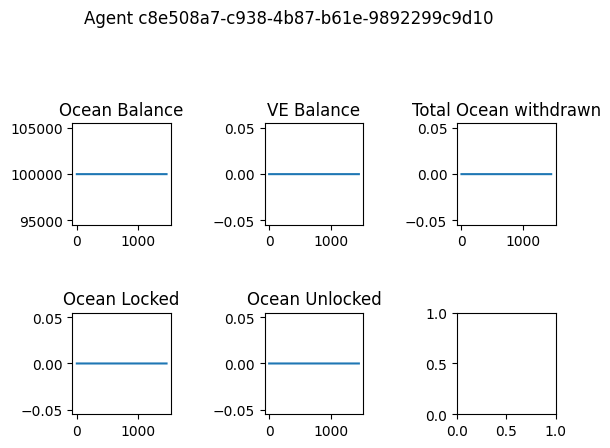

Agent c8e8ca08-1ae9-4bfb-9fda-59d90d68cd3e


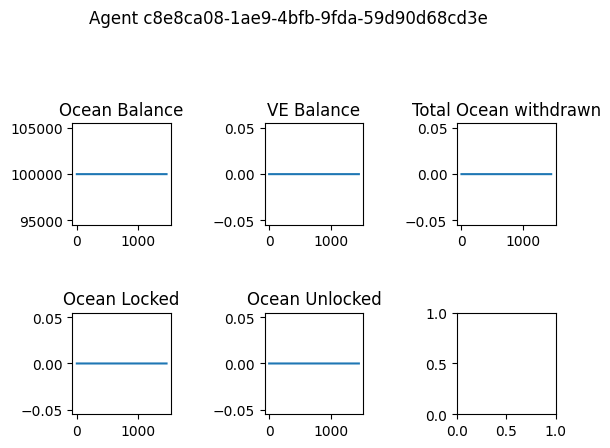

In [ ]:
# create dataframe with columns timestep, acct_id, locked, unlocked, withdrawn, ve_balance
ve_account_data = pd.DataFrame(index=range(1, max(simulation_result.timestep)+1), columns=['locked', 'unlocked', 'withdrawn', 've_balance'])

for agent in agents_list:
    print(f"Agent {agent}")
    # aggregate ve account data for agent
    for i in range(0, max(simulation_result.timestep)):
        #print(f"timestep: {i+1}")
        acct_list = simulation_result[simulation_result.substep == 3].iloc[i].agents_oceanholder[agent].veaccounts.keys()
        #print(f"ve accounts: {acct_list}")
        df_temp = pd.DataFrame()
        if len(acct_list) > 0:
            count_acct = 0
            for acct in acct_list:
                #print(f"ve account: {acct}, timestep: {i+1}, locked: {simulation_result[simulation_result.substep == 3].iloc[i].agents_oceanholder[agent].veaccounts[acct].locked}, unlocked: {simulation_result[simulation_result.substep == 3].iloc[i].agents_oceanholder[agent].veaccounts[acct].unlocked}, withdrawn: {simulation_result[simulation_result.substep == 3].iloc[i].agents_oceanholder[agent].veaccounts[acct].withdrawn}")
                # for every ve acct, we want timestep, locked, unlocked, withdrawn, ve balance
                df_temp.loc[count_acct,'timestep'] = i+1
                df_temp.loc[count_acct,'acct_id'] = acct
                df_temp.loc[count_acct,'locked'] = simulation_result[simulation_result.substep == 3].iloc[i].agents_oceanholder[agent].veaccounts[acct].locked
                df_temp.loc[count_acct,'unlocked'] = simulation_result[simulation_result.substep == 3].iloc[i].agents_oceanholder[agent].veaccounts[acct].unlocked
                df_temp.loc[count_acct,'withdrawn'] = simulation_result[simulation_result.substep == 3].iloc[i].agents_oceanholder[agent].veaccounts[acct].withdrawn
                df_temp.loc[count_acct,'ve_balance'] = simulation_result[simulation_result.substep == 3].iloc[i].agents_oceanholder[agent].veaccounts[acct].vebalance
                count_acct += 1
        else:
            df_temp.loc[0,'timestep'] = i+1
            df_temp.loc[0,'acct_id'] = None
            df_temp.loc[0,'locked'] = None
            df_temp.loc[0,'unlocked'] = None
            df_temp.loc[0,'withdrawn'] = None
            df_temp.loc[0,'ve_balance'] = None
        ve_account_data.loc[i+1, 'locked'] = df_temp['locked'].sum()
        ve_account_data.loc[i+1, 'unlocked'] = df_temp['unlocked'].sum()
        ve_account_data.loc[i+1, 'withdrawn'] = df_temp['withdrawn'].sum()
        ve_account_data.loc[i+1, 've_balance'] = df_temp['ve_balance'].sum()
    fig, axs = plt.subplots(2, 3)
    fig.suptitle(f"Agent {agent}")
    axs[0, 0].plot(simulation_result[simulation_result.substep == 3].timestep, simulation_result[simulation_result.substep == 3].agents_oceanholder.apply(lambda x: x[agent].oceanbalance))
    axs[0, 0].set_title('Ocean Balance')
    axs[0, 1].plot(simulation_result[simulation_result.substep == 3].timestep, ve_account_data.ve_balance)
    axs[0, 1].set_title('VE Balance')
    axs[0, 2].plot(simulation_result[simulation_result.substep == 3].timestep, ve_account_data.withdrawn)
    axs[0, 2].set_title('Total Ocean withdrawn')
    axs[1, 0].plot(simulation_result[simulation_result.substep == 3].timestep, ve_account_data.locked)
    axs[1, 0].set_title('Ocean Locked')
    axs[1, 1].plot(simulation_result[simulation_result.substep == 3].timestep, ve_account_data.unlocked)
    axs[1, 1].set_title('Ocean Unlocked')
    # asset is series, x-axis is timestep, y-axis is votepercent. 
    # plotting assets doesn't work because the agent's votepercent dict is empty before the first vote
    #for asset in assets_list:
    #    axs[1, 2].plot(simulation_result[simulation_result.substep == 3].timestep, simulation_result[simulation_result.substep == 3].agents_oceanholder.apply(lambda x: x[agent].votepercent)[asset], label=f"asset: {asset}")
    #    axs[1, 2].set_title('Vote Percent')
    # add space between the 1st and 2nd row of subplots
    fig.tight_layout(pad=3.0)
    plt.show()


In [ ]:
assets_list = []
for i in range(0,max(simulation_result.timestep)):
    for agent in agents_list:
        assets_list.append(simulation_result[simulation_result.substep == 3].agents_oceanholder.iloc[i][agent].votepercent.keys())
assets_list = list(set([item for sublist in assets_list for item in sublist])) #list of all assets voted on

# get list of all assets
assets_list_2 = []
for i in range(0,max(simulation_result.timestep)):
    assets_list_2.append(simulation_result[simulation_result.substep == 3].agents_data_asset.iloc[i].keys())
assets_list_2 = list(set([item for sublist in assets_list_2 for item in sublist]))

In [ ]:
assets_list_2

['e3113402-eb37-48c8-80bc-f364b55e9e86',
 'f4ef539f-38c2-4c82-ab26-ea80f8786528',
 'b6b994e4-6737-49a2-b2fb-8a83829224aa',
 '16690d61-2e95-4f1a-b77d-1e20ba795919']

Asset e3113402-eb37-48c8-80bc-f364b55e9e86


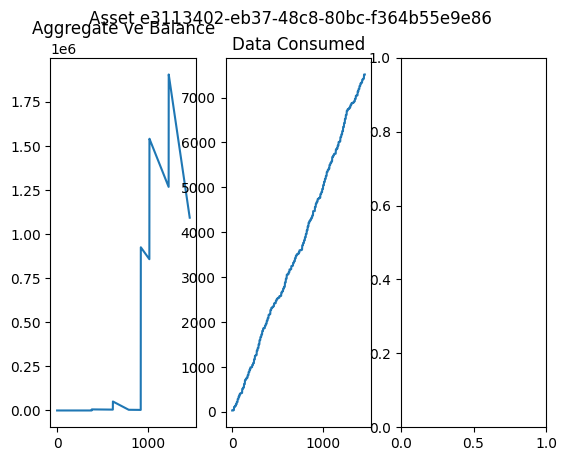

Asset 16690d61-2e95-4f1a-b77d-1e20ba795919


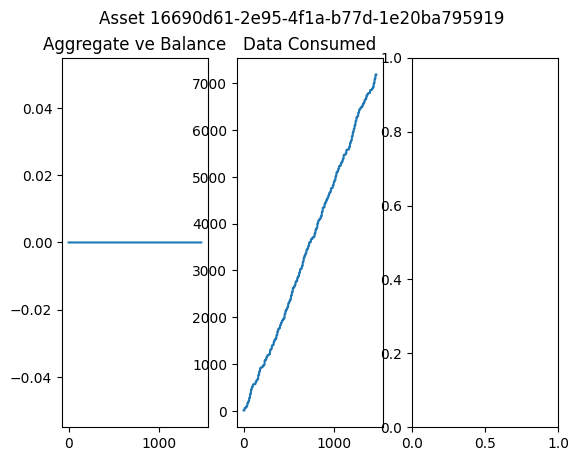

Asset f4ef539f-38c2-4c82-ab26-ea80f8786528


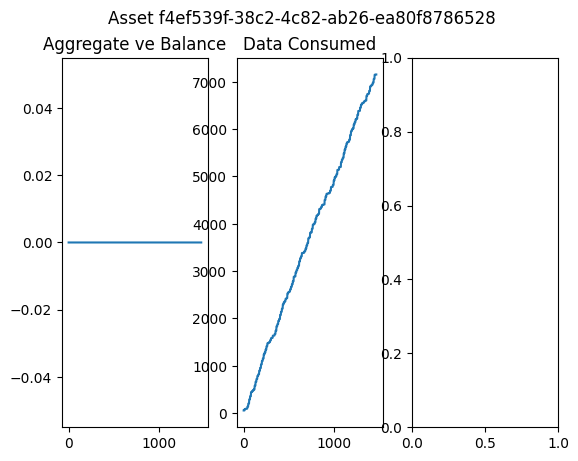

Asset b6b994e4-6737-49a2-b2fb-8a83829224aa


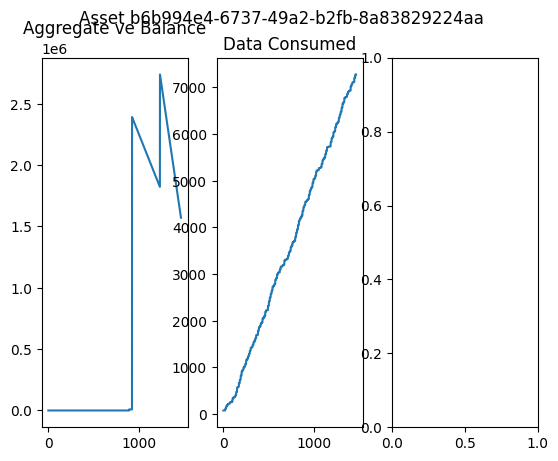

In [ ]:
for asset in assets_list:
    print(f"Asset {asset}")
    fig, axs = plt.subplots(1, 3)
    fig.suptitle(f"Asset {asset}")
    axs[0].plot(simulation_result[simulation_result.substep == 3].timestep, simulation_result[simulation_result.substep == 3].agents_data_asset.apply(lambda x: x[asset].veallocation))
    axs[1].plot(simulation_result[simulation_result.substep == 3].timestep, simulation_result[simulation_result.substep == 3].agents_data_asset.apply(lambda x: x[asset].dataconsumevolume))
    axs[0].set_title('Aggregate ve Balance')
    axs[1].set_title('Data Consumed')
    plt.show()